<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%209%3A%20Prescriptive%20Analytics%3A%20Optimization%20and%20Modelling/9_1_Diet_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prescriptive Analytics: Optimization and Modeling**
## Diet Problem

Diabetes or diabetes mellitus is a disease that occurs as a result of insufficient insulin secretion or insufficient insulin use of pancreas. There is a nutrition program prepared by the Ministry of Health in Table 1 for Type 2 diabetes patients. The minimum and maximum mineral and nutritional values that should be taken for each meal are given in Table 1. For example, while at least 600 kcal of energy is required for a meal, at least 90 mg of magnesium should be taken. There is no upper limit for protein intake.
A diabetic who has a budget of 15 dollars. In addition, each 100 mg. magnesium reduces the cholesterol rate by 5% (5mg). Accordingly, prepare a one-meal diet program that provides the necessary mineral and nutrient intake with the least budget.

**$c_ik:$** Cost of **k**  type warehouse to be opened in **i** district.

$n_ij:$  Neighborhood status of district **i** and district **j**.


In [ ]:
#pip install pyomo
!pip install -q pyomo

In [ ]:
#from pyomo.environ import *

In [ ]:
!apt-get install -y -qq glpk-utils

In [ ]:
import numpy as np
import pandas as pd
import math
import pyomo.environ as pyo
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as img

# Scalar

In order to create the constraints, we defined the values that we need to exceed and take at least in the diet list as a constant variable.

In [ ]:
e=[351,140,64,679,149,116,454]
E=600
p=[11.4,13.2,3.2,14.5,25.6,25.5,18.2]
P=55
m=[131,13,9,165,27,18,379]
M=90
s=[0.3,0,3.9,0,0,0,0]
S=4
o=[0,360,8,0,53,47,0]
O=65
h=[0,360,8,0,53,47,0]
H=800
g=[0,0,0,6.5,2.5,1,17]
G=1
c=[20,2,1,14,35,12,4]
C=15;


In [ ]:
model = pyo.ConcreteModel()

# Decision Variable

$x_i:$  Amount of food to be taken for diet (gr,lt or unit).

# parameters

$c_i:$ The cost considered for 100 grams, 1 lt milk  or 1 egg

$e_i:$ The amount of energy for 100 grams, 1 lt milk  of food or 1 egg.

$p_i:$ The amount of protein for 100 grams, 1 lt milk  of food or 1 egg.

$m_i:$ The amount of Magnezyum for 100 grams, 1 lt milk  of food or 1 egg.

$s_i:$ The amount of sugar for 100 grams of food , 1 lt milk or 1 egg.

$o_i:$ The amount of oil for 100 grams, 1 lt milk  of food or 1 egg.

$h_i:$ The amount of Cholesterol for 100 grams, 1 lt milk  of food or 1 egg.

$g_i:$ The amount of Omega-3 (mg) for 100 grams, 1 lt milk  of food or 1 egg.


In [ ]:
I = range(1,8)
J=  range(1,8)
model.x = pyo.Var(I, domain = pyo.NonNegativeReals) 

# Objection Function

Getting the necessary nutrients at the least cost constitutes the objective function

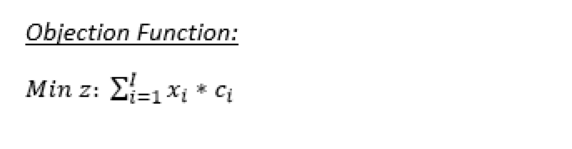

In [ ]:
import matplotlib.image as img

url=   'https://drive.google.com/file/d/1FWCGaS9ata8wbFgb4gTxEjFr7PKZEJn-/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
img1 = img.imread(path)
#img1 = img.imread('dietobj.png')
plt.subplots(figsize=(10, 10))
plt. axis("off")
imgplot = plt.imshow(img1)

In [ ]:
model.obj_val = pyo.Objective(expr = (sum (model.x[i] * c[i-1] for i in I )),sense = pyo.minimize)

# Subject To

Diet conditions are added to the model below.

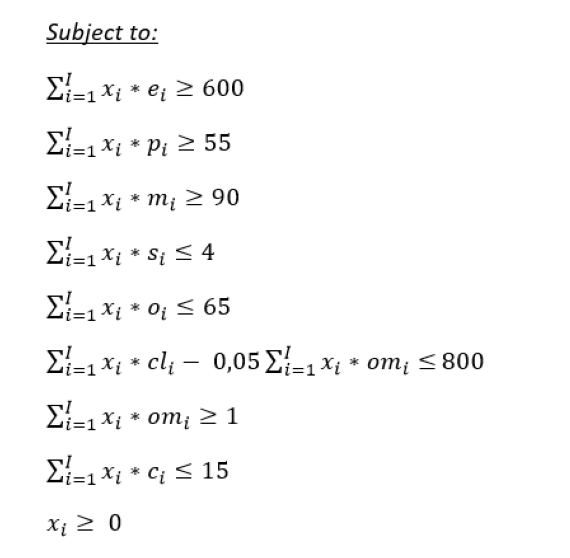

In [ ]:
import matplotlib.image as img
url2=   'https://drive.google.com/file/d/1kHnF4rcsLfs6Gc4B1iOJjllQ888E-hyO/view?usp=sharing'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
img2 = img.imread(path2)
plt.subplots(figsize=(10, 10))
plt. axis("off")
imgplot = plt.imshow(img2)

In [ ]:
model.diet = pyo.ConstraintList()
model.diet.add(sum(model.x[i]*e[i-1] for i  in I) >=E)
model.diet.add(sum(model.x[i]*p[i-1] for i  in I) >=P)
model.diet.add(sum(model.x[i]*m[i-1] for i  in I) >=M)
model.diet.add(sum(model.x[i]*s[i-1] for i  in I) <=S)
model.diet.add(sum(model.x[i]*o[i-1] for i  in I) <=O)
model.diet.add(sum(model.x[i]*h[i-1]-0.05*model.x[i]*g[i-1] for i  in I) <=H)
model.diet.add(sum(model.x[i]*g[i-1] for i  in I) >=G)
model.diet.add(sum(model.x[i]*c[i-1] for i  in I) <=30)
model.diet.pprint()

diet : Size=8, Index=diet_index, Active=True
    Key : Lower : Body                                                                                                  : Upper : Active
      1 : 600.0 :                             351*x[1] + 140*x[2] + 64*x[3] + 679*x[4] + 149*x[5] + 116*x[6] + 454*x[7] :  +Inf :   True
      2 :  55.0 :                      11.4*x[1] + 13.2*x[2] + 3.2*x[3] + 14.5*x[4] + 25.6*x[5] + 25.5*x[6] + 18.2*x[7] :  +Inf :   True
      3 :  90.0 :                                 131*x[1] + 13*x[2] + 9*x[3] + 165*x[4] + 27*x[5] + 18*x[6] + 379*x[7] :  +Inf :   True
      4 :  -Inf :                                                                                   0.3*x[1] + 3.9*x[3] :   4.0 :   True
      5 :  -Inf :                                                                 360*x[2] + 8*x[3] + 53*x[5] + 47*x[6] :  65.0 :   True
      6 :  -Inf : 360*x[2] + 8*x[3] - 0.325*x[4] + 53*x[5] - 0.125*x[5] + 47*x[6] - 0.05*x[6] - 0.8500000000000001*x[7] : 800.0 :   T

In [ ]:
b={1:"100 gr Oat",2:"1 unit Egg",3:"1 lt Milk", 4:"100 gr Walnut kernel", 5:"100 gr Somon", 6:"100 gr Tuna fish", 7:"100 gr Flaxseed"}

In [ ]:
#pip install glpk


In [ ]:
#model

In [ ]:
#pip list

In [ ]:
#from pyomo.opt import SolverFactory

Since the problem is linear, the "glpk" solver is used.

In [ ]:
print("---------------Solution of diet problem--------------")
opt = pyo.SolverFactory("glpk")
opt.solve(model)
for i in I:
    if pyo.value(model.x[i]) > 0:
        print("Menu is:",pyo.value(model.x[i]), model.x[i])
print("---------------Amount to be spent on diet-------------")        
print("Diet is ", pyo.value(model.obj_val),'Dolars');        
print("--------------Essential nutrients for diet------------")        
for i in I:
    if pyo.value(model.x[i]) > 0:        
        print("Menu is:", pyo.value(model.x[i]), "unit", b[i]);

---------------Solution of diet problem--------------
Menu is: 0.180555555555556 x[2]
Menu is: 2.89102564102564 x[7]
---------------Amount to be spent on diet-------------
Diet is  11.925213675213673 Dolars
--------------Essential nutrients for diet------------
Menu is: 0.180555555555556 unit 1 unit Egg
Menu is: 2.89102564102564 unit 100 gr Flaxseed


In [ ]:
print("Values of Energy intake is",sum( pyo.value(model.x[i])*e[i-1] for i  in I ),"Kcal")
print("Values of Protein intake",sum( pyo.value(model.x[i])*p[i-1] for i  in I ), "mg")
print("Values of Magnesium intake",sum( pyo.value(model.x[i])*m[i-1] for i  in I ), "mg")
print("Values of Sugar intake",sum( pyo.value(model.x[i])*s[i-1] for i  in I ), "mg")
print("Values of Oil intake",sum( pyo.value(model.x[i])*o[i-1] for i  in I ), "mg")
print("Values of Cholesterol intake",sum( pyo.value(model.x[i])*h[i-1] for i  in I ), "mg")
print("Values of Omega-3 intake",sum( pyo.value(model.x[i])*g[i-1] for i  in I ), "mg")
print("Cost of diet program is", sum(pyo.value(model.x[i])*c[i-1] for i  in I ), "dollars")


Values of Energy intake is 1337.8034188034185 Kcal
Values of Protein intake 54.999999999999986 mg
Values of Magnesium intake 1098.0459401709397 mg
Values of Sugar intake 0.0 mg
Values of Oil intake 65.00000000000016 mg
Values of Cholesterol intake 65.00000000000016 mg
Values of Omega-3 intake 49.147435897435884 mg
Cost of diet program is 11.925213675213673 dollars


When all dietary requirements are met, the cost is $11,925.

Moreover, other diet values are shown as output above.